<h3>1.1 Imports from Keras </h3>

In [1]:
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, BatchNormalization, Activation, Flatten, Reshape, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import Sequential, Model
# Useful imports
import matplotlib as mpl
#mpl.use("Agg") # Uncomment this if you have problems to use plt.imshow
# In that case, replace plt.imshow by plt.imsave(’filename.png’, var),
# so the image will be saved to a file instead of displayed.
import matplotlib.pyplot as plt  # For plotting/saving images
import numpy as np

Using TensorFlow backend.


<h3>1.2 Loading the MNIST dataset</h3>

11493376/11490434 [==============================] - 0s 0us/step
Train set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)
Train categorical labels shape: (60000, 10)
Test categorical labels shape: (10000, 10)
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


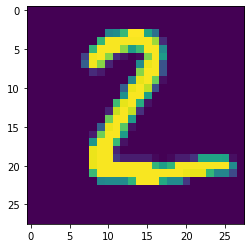

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Image normalization
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1
# Add one dimmention for the grayscale channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
# Labels to categorical (one hot)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
# Display dataset info
print ("Train set shape:", x_train.shape)
print ("Test set shape:", x_test.shape)
print ("Train categorical labels shape:", y_train_cat.shape)
print ("Test categorical labels shape:", y_test_cat.shape)
# Show one example
print (y_test[1], y_test_cat[1])
plt.imshow(x_test[1,:,:,0])

<font color="red"> Question 1 </font></br>
<font color="blue"> Il y a 60 000 images de taille 28x28x1. </font>

<font color="red"> Question 2 </br>
<font color="blue"> Les images des échantillons de MNIST sont en noir et blanc. Nous avons donc deux valeurs pour les pixels des images qui sont 0 ou 255. On normalise ces pixels par la moyenne de ces deux valeurs qui vaut 127.5, puis on retranche 1 pour se retrouver avec des pixels entre -1 et 1.</font>

<font color="red"> Question 3 </font></br>
<font color="blue"> Il y a 10 classes pour catégoriser la base de données. </font>

<font color="red"> Question 4 </font></br>
<font color="blue"> La taille de l'image est 28x28x1, on a donc 1 canal de couleur.</font>

<h2> 2. Image classification

<h3> 2.1 Multilayer perceptron

In [9]:
# Discriminator using DNN
D = Sequential(name="Discriminator")
# Layer 1
D.add(Flatten(input_shape=(28, 28, 1)))
D.add(Dense(1024))
D.add(BatchNormalization())
D.add(Activation("relu"))
# Layer 2
D.add(Dense(10))
D.add(Activation("softmax"))
D.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
D.summary()
D.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat))
D.save_weights('weightsDNN.hdf5')

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 818,186
Trainable params: 816,138
Non-trainable params: 2,048
___________________________________________

<h3> 2.2 Convolutional neural networks </h3>

In [10]:
# Discriminator using CNN
D = Sequential(name="Discriminator")
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(10))
D.add(Activation("softmax"))
D.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
D.summary()
D.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat))

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
activation_6 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
activation_7 (Activation)    (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)            

<font color="red"> Question 5 </font></br>
<font color="blue"> Il y a 816138 paramètres pour le MLP et 520586 paramètres pour le modèle CNN. </font>

<font color="red"> Question 6 </font></br>
<font color="blue"> Le modèle CNN semble meilleur pour cette tâche, en effet, ce modèle semble plus adapté pour nos données car il possède moins de paramètres (car les poids sont partagés entre plusieurs neurones ce qui a pour conséquence un meilleur apprentissage).
Le modèle CNN possède aussi une meilleure précision (val_acc: 0,9642 contre 0,9606).
Enfin, les filtres sont efficaces pour reconnaître des motifs récurrents, ce qui semble être adapté pour classifier des chiffres. </font>

<h2> Artificial image generation </h2>

<h3> 3.1 GAN with fully-connected layers

In [12]:
G = Sequential(name="Generator")
# Layer 1
G.add(Dense(256, input_shape=(100,)))
G.add(BatchNormalization())
G.add(Activation("relu"))
# Layer 2
G.add(Dense(512))
G.add(Activation("relu"))
# Layer 3
G.add(Dense(784))
G.add(Activation("tanh"))
G.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001, 0.5), metrics=["accuracy"])
G.summary()
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               25856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               402192    
_________________________________________________________________
activation_15 (Activation)   (None, 784)               0 

<font color="red"> Question 7 </font></br>
<font color="blue"> La fonction d’activation la plus adaptée pour le modèle du discriminateur semble être la fonction sigmoid car on a, en sortie, une probabilité et on veut avoir True si celle-ci est supérieure à 0.5 et False sinon.
Pour le modèle du générateur, la fonction d’activation choisie est tanh car on sait que les valeurs normalisées des pixels des images réelles sont comprises entre -1 et 1. </font>

In [13]:
G = Sequential()
# Layer 1
G.add(Dense(256, input_shape=(100,)))
G.add(BatchNormalization())
G.add(Activation("relu"))
# Layer 2
G.add(Dense(512, input_shape=(256,)))
G.add(Activation("relu"))
# Layer 3
G.add(Dense(784, input_shape=(512,)))
G.add(Activation("tanh"))
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

D = Sequential()
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(1))
D.add(Activation("sigmoid"))

D.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
D.trainable = False
gan_input = Input(shape=(100,))
gan_output = D(G(gan_input))
gan = Model(gan_input, gan_output) # This is the combined model
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         560656    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 519425    
Total params: 1,080,081
Trainable params: 560,144
Non-trainable params: 519,937
_________________________________________________________________


<font color="red"> Question 8 </font></br>
<font color="blue"> On utilise le binary_crossentropy car on se retrouve avec 2 labels et non plus avec 10 classes. </font>

In [14]:
batch_size = 64
x_train_c = x_train[np.where(y_train == 4)[0]] # Lets train only for numbers 4
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 90/91:  gloss=1.9679, dloss=0.6316
Epoch 2, batch 90/91:  gloss=2.3097, dloss=0.3186
Epoch 3, batch 90/91:  gloss=3.0843, dloss=0.2825
Epoch 4, batch 90/91:  gloss=1.9628, dloss=0.3153
Epoch 5, batch 90/91:  gloss=3.1350, dloss=0.2496
Epoch 6, batch 90/91:  gloss=2.2955, dloss=0.3043
Epoch 7, batch 90/91:  gloss=2.9520, dloss=0.2310
Epoch 8, batch 90/91:  gloss=2.9843, dloss=0.2653
Epoch 9, batch 90/91:  gloss=3.5237, dloss=0.2245
Epoch 10, batch 90/91:  gloss=3.3324, dloss=0.2186
Epoch 11, batch 90/91:  gloss=6.1021, dloss=0.3380
Epoch 12, batch 90/91:  gloss=3.3392, dloss=0.2405
Epoch 13, batch 90/91:  gloss=3.3112, dloss=0.2359
Epoch 14, batch 90/91:  gloss=3.2032, dloss=0.2382
Epoch 15, batch 90/91:  gloss=3.1135, dloss=0.2410
Epoch 16, batch 90/91:  gloss=3.7501, dloss=0.2089
Epoch 17, batch 90/91:  gloss=4.5085, dloss=0.2221
Epoch 18, batch 90/91:  gloss=3.1564, dloss=0.2310
Epoch 19, batch 90/91:  gloss=3.6289, dloss=0.2258
Epoch 20, batch 90/91:  gloss=4.0456, dl

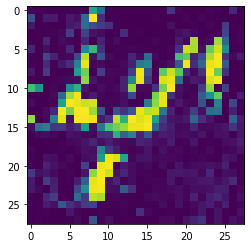

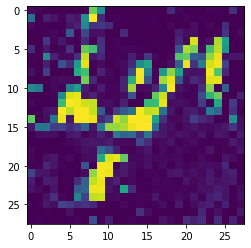

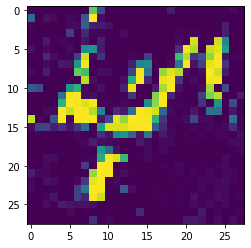

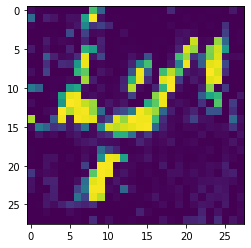

In [15]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,0] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,0])

<font color="red"> Question 9 </font></br>
<font color="blue"> Il est nécessaire d’utiliser 0.9 au lieu de 1 pour être sur d’avoir une backward propagation et donc d’entraîner le modèle. 
En effet, si la probabilité finale est trop proche de 1 (donc ŷ≈1), la fonction de loss définie comme -ylog(ŷ) sera environ égal à 0, pareillement, le gradient défini comme σ(x)(1-σ(x)) sera lui aussi environ égal à 0 et donc la backward propagation sera nulle et le modèle ne sera pas entraîné. </font>

<h3> 3.2 Deep convolutional GAN (DCGAN) </h3>

In [16]:
G = Sequential()
G.add(Dense(7*7*128, input_shape=(100,)))
G.add(Activation("relu"))
G.add(Reshape((7, 7, 128)))
G.add(Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (14x14x64)
G.add(Conv2DTranspose(32, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (28x28x32)
G.add(Conv2DTranspose(1, kernel_size=(5, 5), strides=(1, 1), padding="same"))  # The output shape is (28x28x1)
G.add(Activation("tanh"))
G.summary()
G.add(Reshape((28, 28, 1))) # The output has the shape of an image

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6272)              633472    
_________________________________________________________________
activation_24 (Activation)   (None, 6272)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        51232     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         801       
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 1)        

In [17]:
G = Sequential()
G.add(Dense(7*7*128, input_shape=(100,)))
G.add(Activation("relu"))
G.add(Reshape((7, 7, 128)))
G.add(Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (14x14x64)
G.add(Conv2DTranspose(32, kernel_size=(5, 5), strides=(2, 2), padding="same")) # The output shape is (28x28x32)
G.add(Conv2DTranspose(1, kernel_size=(5, 5), strides=(1, 1), padding="same"))  # The output shape is (28x28x1)
G.add(Activation("tanh"))
G.add(Reshape((28, 28, 1))) # The output has the shape of an image



D = Sequential()
# Layer 1
D.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)))
D.add(Activation("relu"))
# Layer 2
D.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 3
D.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
D.add(Activation("relu"))
# Layer 4
D.add(Flatten())
D.add(Dense(128))
D.add(Activation("relu"))
# Layer 5
D.add(Dense(1))
D.add(Activation("sigmoid"))



D.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
D.trainable = False
gan_input = Input(shape=(100,))
gan_output = D(G(gan_input))
gan = Model(gan_input, gan_output) # This is the combined model
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0001, 0.5))
gan.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28, 1)         890369    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 519425    
Total params: 1,409,794
Trainable params: 890,369
Non-trainable params: 519,425
_________________________________________________________________


In [18]:
batch_size = 64
x_train_c = x_train[np.where(y_train == 4)[0]] # Lets train only for numbers 4
num_batches = int(len(x_train_c) / batch_size)
for epoch in range(20):
  for batch in range(num_batches):
    # Select a random batch from x_train_c
    x = x_train_c[np.random.randint(0, len(x_train_c), size=batch_size)]
    # Gaussian noise for the generator model
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    # Generate fake images
    gen_imgs = G.predict(noise)
    disc_data = np.concatenate([x, gen_imgs])
    # True images are labeled 1, false ones are 0
    labels = [0.9]*batch_size + [0]*batch_size
    D.trainable = True
    dloss = D.train_on_batch(disc_data, labels)
    D.trainable = False # Freeze the discriminator
    gloss = gan.train_on_batch(noise, [1]*batch_size)
    print ("\b"*79 + "\r", end="")
    print ("Epoch %d, batch %d/%d: " % (epoch+1, batch, num_batches) + \
    " gloss=%.4f, dloss=%.4f" % (gloss, dloss), end="")
  print ("")
# Save the weights after training
G.save_weights("./gen_weights.hdf5")
D.save_weights("./disc_weights.hdf5")

Epoch 1, batch 90/91:  gloss=1.2131, dloss=0.4061
Epoch 2, batch 90/91:  gloss=1.4894, dloss=0.4093
Epoch 3, batch 90/91:  gloss=0.8478, dloss=0.5462
Epoch 4, batch 90/91:  gloss=1.0544, dloss=0.5399
Epoch 5, batch 90/91:  gloss=1.5802, dloss=0.4758
Epoch 6, batch 90/91:  gloss=1.6217, dloss=0.4653
Epoch 7, batch 90/91:  gloss=1.2134, dloss=0.5740
Epoch 8, batch 90/91:  gloss=1.8325, dloss=0.5645
Epoch 9, batch 90/91:  gloss=1.2582, dloss=0.5096
Epoch 10, batch 90/91:  gloss=1.4304, dloss=0.4776
Epoch 11, batch 90/91:  gloss=1.3272, dloss=0.5468
Epoch 12, batch 90/91:  gloss=1.2603, dloss=0.5477
Epoch 13, batch 90/91:  gloss=1.2898, dloss=0.5534
Epoch 14, batch 90/91:  gloss=1.1296, dloss=0.5463
Epoch 15, batch 90/91:  gloss=0.7937, dloss=0.5954
Epoch 16, batch 90/91:  gloss=1.3264, dloss=0.5280
Epoch 17, batch 90/91:  gloss=1.7835, dloss=0.6062
Epoch 18, batch 90/91:  gloss=1.2334, dloss=0.5680
Epoch 19, batch 90/91:  gloss=0.9189, dloss=0.6042
Epoch 20, batch 90/91:  gloss=1.1289, dl

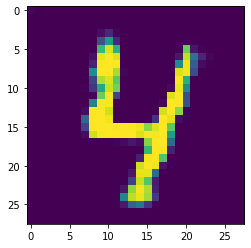

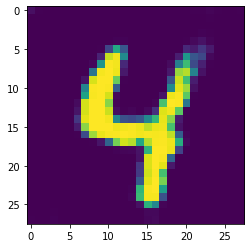

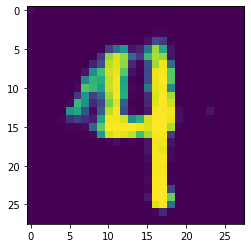

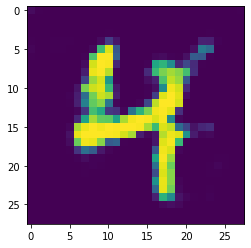

In [19]:
noise = np.random.normal(0, 1, size=[4, 100])
gen_imgs = G.predict(noise)
for i in range(len(noise)):
  plt.imshow((gen_imgs[i,:,:,0] + 1) / 2)
  plt.show()
  plt.imsave('img%02d.png' % i, gen_imgs[i,:,:,0])

Nous avons à notre disposition un dataset d’images de taille 28x28 (60000 images pour l’entraînement et 10000 pour le test). 
Pour construire le discriminateur nous avons essayé deux modèles :
-modèle Deep Neural Network (ou MLP) 
-modèle utilisant des convolutions 
Le deuxième modèle est le plus intéressant car celui-ci offre une meilleure précision tout en possédant moins de paramètres (le modèle apprend moins ‘par coeur’). Nous avons donc utilisé ce modèle pour notre GAN.

Pour construire le générateur nous avons utilisé, dans un premier temps, un modèle reprenant le même principe que notre premier discriminateur (MLP) mais dans le sens inverse, on a de plus en plus de neurones au fil des couches. 
Dans un second temps, nous avons construit notre modèle du générateur comme un « deconvolutional neural network » en utilisant la fonction Conv2DTranspose.

Puisqu’il possède plus de paramètres, ce nouveau modèle s’avère être plus performant dans la création d’image, celles-ci paraissent (légèrement) plus authentiques. 